In standard mathematics we routinely write down abstract variables or concepts and manipulate them without ever assigning specific values to them. An example would be the quadratic equation
\begin{equation}
  a x^2 + b x + c = 0
\end{equation}
and its roots $x_{\pm}$: we can write down the solutions of the equation and discuss the existence, within the real numbers, of the roots, without specifying the particular values of the parameters $a, b$ and $c$.

In a standard computer programming language, we can write *functions* that encapsulate the solutions of the equation, but calling those functions requires us to specify values of the parameters. In general, the value of a variable must be given before the variable can be used.

However, there *do* exist *Computer Algebra Systems* that can perform manipulations in the "standard" mathematical form. Through the university you will have access to Wolfram Mathematica and Maple, which are commercial packages providing a huge range of mathematical tools. There are also freely available packages, such as SageMath and `sympy`. These are not always easy to use, as all CAS have their own formal languages that rarely perfectly match your expectations.

Here we will briefly look at `sympy`, which is a pure python CAS. `sympy` is not suitable for complex calculations, as it's far slower than the alternatives. However, it does interface very cleanly with python, so can be used inside python code, especially to avoid entering lengthy expressions.

# sympy

## Setting up

Setting up `sympy` is straightforward:

In [1]:
import sympy
sympy.init_printing()

The standard `import` command is used. The `init_printing` command looks at your system to find the clearest way of displaying the output; this isn't necessary, but is helpful for understanding the results.

To do *anything* in `sympy` we have to explicitly tell it if something is a variable, and what name it has. There are two commands that do this. To declare a single variable, use

In [2]:
x = sympy.Symbol('x')

To declare multiple variables at once, use

In [3]:
y, z0 = sympy.symbols(('y', 'z_0'))

Note that the "name" of the variable does not need to match the symbol with which it is displayed. We have used this with `z0` above:

In [4]:
z0

Once we have variables, we can define new variables by operating on old ones:

In [5]:
a = x + y
b = y * z0
print("a={}. b={}.".format(a, b))

a=x + y. b=y*z_0.


In [6]:
a

In addition to variables, we can also define general functions. There is only one option for this:

In [7]:
f = sympy.Function('f')

## In-built functions

We have seen already that mathematical functions can be found in different packages. For example, the $\sin$ function appears in `math` as `math.sin`, acting on a single number. It also appears in `numpy` as `numpy.sin`, where it can act on vectors and arrays in one go. `sympy` re-implements many mathematical functions, for example as `sympy.sin`, which can act on abstract (`sympy`) variables.

Whenever using `sympy` we should use `sympy` functions, as these can be manipulated and simplified. For example:

In [8]:
c = sympy.sin(x)**2 + sympy.cos(x)**2

In [9]:
c

In [10]:
c.simplify()

Note the steps taken here. `c` is an object, something that `sympy` has created. Once created it can be manipulated and simplified, using the methods on the object. It is useful to use tab completion to look at the available commands. For example,

In [11]:
d = sympy.cosh(x)**2 - sympy.sinh(x)**2

Now type `d.` and then tab, to inspect all the available methods. As before, we could do

In [12]:
d.simplify()

but there are many other options.

## Solving equations

Let us go back to our quadratic equation and check the solution. To define an *equation* we use the `sympy.Eq` function:

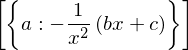

In [13]:
a, b, c, x = sympy.symbols(('a', 'b', 'c', 'x'))
quadratic_equation = sympy.Eq(a*x**2+b*x+c, 0)
sympy.solve(quadratic_equation)

What happened here? `sympy` is not smart enough to know that we wanted to solve for `x`! Instead, it solved for the first variable it encountered. Let us try again:

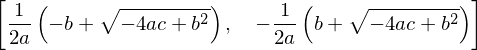

In [14]:
sympy.solve(quadratic_equation, x)

This is our expectation: multiple solutions, returned as a list. We can access and manipulate these results:

In [15]:
roots = sympy.solve(quadratic_equation, x)
xplus, xminus = sympy.symbols(('x_{+}', 'x_{-}'))
xplus = roots[0]
xminus = roots[1]

We can substitute in specific values for the parameters to find solutions:

In [16]:
xplus_solution = xplus.subs([(a,1), (b,2), (c,3)])
xplus_solution

We have a list of substitutions. Each substitution is given by a tuple, containing the variable to be replaced, and the expression replacing it. We do not have to substitute in numbers, as here, but could use other variables:

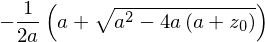

In [17]:
xminus_solution = xminus.subs([(b,a), (c,a+z0)])
xminus_solution

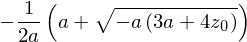

In [18]:
xminus_solution.simplify()

We can use similar syntax to solve *systems* of equations, such as
\begin{align}
  x + 2 y &= 0, \\ xy & = z_0.
\end{align}

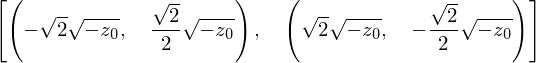

In [19]:
eq1 = sympy.Eq(x+2*y, 0)
eq2 = sympy.Eq(x*y, z0)
sympy.solve([eq1, eq2], [x, y])

## Differentiation and integration

### Differentiation

There is a standard function for differentiation, `diff`:

In [20]:
expression = x**2*sympy.sin(sympy.log(x))
sympy.diff(expression, x)

A parameter can control how many times to differentiate:

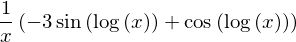

In [21]:
sympy.diff(expression, x, 3)

Partial differentiation with respect to multiple variables can also be performed by increasing the number of arguments:

In [22]:
expression2 = x*sympy.cos(y**2 + x)
sympy.diff(expression2, x, 2, y, 3)

There is also a function representing an *unevaluated* derivative:

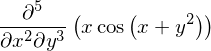

In [23]:
sympy.Derivative(expression2, x, 2, y, 3)

These can be useful for display, building up a calculation in stages, simplification, or when the derivative cannot be evaluated. It can be explicitly evaluated using the `doit` function:

In [24]:
sympy.Derivative(expression2, x, 2, y, 3).doit()

### Integration

Integration uses the `integrate` function. This can calculate either definite or indefinite integrals, but will *not* include the integration constant.

In [25]:
integrand=sympy.log(x)**2
sympy.integrate(integrand, x)

In [26]:
sympy.integrate(integrand, (x, 1, 10))

The definite integral is specified by passing a tuple, with the variable to be integrated (here `x`) and the lower and upper limits (which can be expressions).

Note that `sympy` includes an "infinity" object `oo` (two `o`'s), which can be used in the limits of integration:

In [27]:
sympy.integrate(sympy.exp(-x), (x, 0, sympy.oo))

Multiple integration for higher dimensional integrals can be performed:

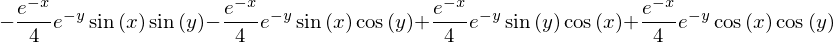

In [28]:
sympy.integrate(sympy.exp(-(x+y))*sympy.cos(x)*sympy.sin(y), x, y)

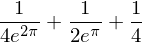

In [29]:
sympy.integrate(sympy.exp(-(x+y))*sympy.cos(x)*sympy.sin(y), 
                (x, 0, sympy.pi), (y, 0, sympy.pi))

Again, there is an unevaluated integral:

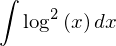

In [30]:
sympy.Integral(integrand, x)

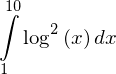

In [31]:
sympy.Integral(integrand, (x, 1, 10))

Again, the `doit` method will explicitly evaluate the result where possible.

## Differential equations

Defining and solving differential equations uses the pattern from the previous sections. We'll use the same example problem as in the `scipy` case, 
\begin{equation}
  \frac{\text{d} y}{\text{d} t} = e^{-t} - y, \qquad y(0) = 1.
\end{equation}

First we define that $y$ is a function, currently unknown, and $t$ is a variable.

In [32]:
y = sympy.Function('y')
t = sympy.Symbol('t')

`y` is a general function, and can be a function of anything at this point (any number of variables with any name). To use it consistently, we *must* refer to it explicitly as a function of $t$ everywhere. For example,

In [33]:
y(t)

We then define the differential equation. `sympy.Eq` defines the equation, and `diff` differentiates:

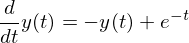

In [34]:
ode = sympy.Eq(y(t).diff(t), sympy.exp(-t) - y(t))
ode

Here we have used `diff` as a method applied to the function. As `sympy` can't differentiate $y(t)$ (as it doesn't have an explicit value), it leaves it unevaluated.

We can now use the `dsolve` function to get the solution to the ODE. The syntax is very similar to the `solve` function used above:

In [35]:
sympy.dsolve(ode, y(t))

This is simple enough to solve, but we'll use symbolic methods to find the constant, by setting $t = 0$ and $y(t) = y(0) = 1$.

In [36]:
general_solution = sympy.dsolve(ode, y(t))
value = general_solution.subs([(t,0), (y(0), 1)])
value

We then find the specific solution of the ODE.

In [37]:
ode_solution = general_solution.subs([(value.rhs,value.lhs)])
ode_solution

## Plotting

`sympy` provides an interface to `matplotlib` so that expressions can be directly plotted. For example,

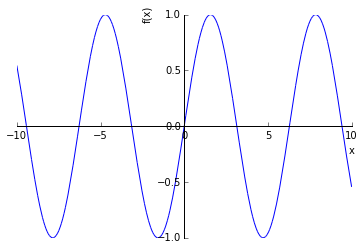

In [38]:
%matplotlib inline
sympy.plot(sympy.sin(x));

We can explicitly set limits, for example

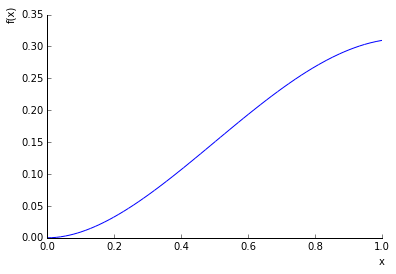

In [39]:
sympy.plot(sympy.exp(-x)*sympy.sin(x**2), (x, 0, 1));

We can plot the solution to the differential equation computed above:

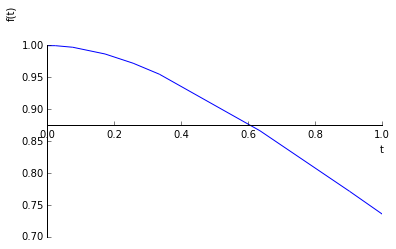

In [40]:
sympy.plot(ode_solution.rhs, xlim=(0, 1), ylim=(0.7, 1.05));

This can be *visually* compared to the previous result. However, we would often like a more precise comparison, which requires numerically evaluating the solution to the ODE at specific points.

## lambdify

At the end of a symbolic calculation using `sympy` we will have a result that is often long and complex, and that is needed in another part of another code. We could type the appropriate expression in by hand, but this is tedious and error prone. A better way is to make the computer do it.

The example we use here is the solution to the ODE above. We have solved it symbolically, and the result is straightforward. We can also solve it numerically using `scipy`. We want to compare the two.

First, let us compute the `scipy` numerical result:

In [41]:
def dydt(y, t):
    """
    Defining the ODE dy/dt = e^{-t} - y.
    
    Parameters
    ----------
    
    y : real
        The value of y at time t (the current numerical approximation)
    t : real
        The current time t
        
    Returns
    -------
    
    dydt : real
        The RHS function defining the ODE.
    """
    
    from numpy import exp
    
    return exp(-t) - y

from scipy.integrate import odeint
import numpy

t_scipy = numpy.linspace(0.0, 1.0)
y0 = [1.0]

y_scipy = odeint(dydt, y0, t_scipy)

We want to evaluate our `sympy` solution at the same points as our `scipy` solution, in order to do a direct comparison. In order to do that, we want to construct a function that computes our `sympy` power series solution, without typing it in. That is what `lambdify` is for: it creates a function from a sympy expression.

First let us get the expression explicitly:

In [42]:
ode_expression = ode_solution.rhs
ode_expression

Then we construct the function using `lambdify`:

In [43]:
from sympy.utilities.lambdify import lambdify

ode_function = lambdify((t,), ode_expression, modules='numpy')

The first argument to `lambdify` is a tuple containing the arguments of the function to be created. In this case that's just `t`, the time(s) at which we want to evaluate the expression. The second argument to `lambdify` is the expression that we want converted into a function. The third argument, which is optional, tells `lambdify` that where possible it should use `numpy` functions. This means that we can call the function using `numpy` arrays, and it will calculate using `numpy` array expressions, doing the whole calculation in a single call.

We now have a function that we can directly call:

In [44]:
print("sympy solution at t=0: {}".format(ode_function(0.0)))
print("sympy solution at t=0.5: {}".format(ode_function(0.5)))

sympy solution at t=0: 1.0
sympy solution at t=0.5: 0.9097959895689501


And we can directly apply this function to the times at which the `scipy` solution is constructed, for comparison:

In [45]:
y_sympy = ode_function(t_scipy)

Now we can we `matplotlib` to plot both on the same figure:

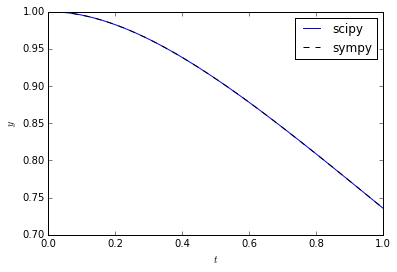

In [46]:
from matplotlib import pyplot
pyplot.plot(t_scipy, y_scipy[:,0], 'b-', label='scipy')
pyplot.plot(t_scipy, y_sympy, 'k--', label='sympy')
pyplot.xlabel(r'$t$')
pyplot.ylabel(r'$y$')
pyplot.legend(loc='upper right')
pyplot.show()

We see good visual agreement everywhere. But how accurate is it?

Now that we have `numpy` arrays explicitly containing the solutions, we can manipulate these to see the differences between solutions:

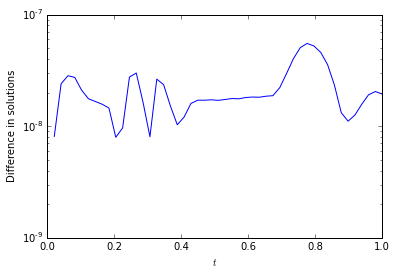

In [47]:
pyplot.semilogy(t_scipy, numpy.abs(y_scipy[:,0]-y_sympy))
pyplot.xlabel(r'$t$')
pyplot.ylabel('Difference in solutions');

The accuracy is around $10^{-8}$ everywhere - by modifying the accuracy of the `scipy` solver this can be made more accurate (if needed) or less (if the calculation takes too long and high accuracy is not required).

# Further reading

`sympy` has [detailed documentation](http://docs.sympy.org/latest/index.html) and a [useful tutorial](http://docs.sympy.org/dev/tutorial/index.html).

# Exercise : systematic ODE solving

We are interested in the solution of

\begin{equation}
  \frac{\text{d} y}{\text{d} t} = e^{-t} - y^n, \qquad y(0) = 1,
\end{equation}

where $n > 1$ is an integer. The "minor" change from the above examples mean that `sympy` can only give the solution as a power series.

## Exercise 1

Compute the general solution as a power series for $n = 2$.

## Exercise 2

Investigate the help for the `dsolve` function to straightforwardly impose the initial condition $y(0) = 1$ using the `ics` argument. Using this, compute the specific solutions that satisfy the ODE for $n = 2, \dots, 10$.

## Exercise 3

Using the `removeO` command, plot each of these solutions for $t \in [0, 1]$.